In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras==2.7
!pip install tensorflow==2.7

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

2022-11-17 16:42:03.304647: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow


In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator (rescale=1./255, 
                                     shear_range=0.2,zoom_range=0.2, 
                                     horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
pwd

'/home/wsuser/work'

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Y7BEJMVpRCOXeFUanyhvERYLcebZXeLhQeSf11hcO987',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'agesturebasedtoolforsterilebrowsi-donotdelete-pr-i3edjfyw5fywvp'
object_key = 'Dataset.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [8]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()), "r")
file_paths = unzip.namelist() 
for path in file_paths:
    unzip.extract(path)

In [9]:
pwd

'/home/wsuser/work'

In [10]:
import os
filenames = os.listdir('/home/wsuser/work/Dataset/train')

In [11]:
x_train = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/train',target_size=(64, 64), 
                                            batch_size=32, 
                                            color_mode='grayscale',
                                            class_mode='categorical')
x_test = test_datagen.flow_from_directory('/home/wsuser/work/Dataset/test',
                                          target_size=(64, 64), batch_size=32, 
                                          color_mode='grayscale', 
                                          class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [12]:
x_train.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

# Importing The Model Building Libraries

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [14]:
print(x_train.class_indices) 

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


# Initializing The Model

In [15]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [16]:
model=Sequential()

2022-11-17 16:42:06.247386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 16:42:06.247430: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


# Adding CNN Layers

In [17]:
# First convolution Layer and pooling
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution Layer and pooling
model.add(Conv2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the layers
model.add(Flatten())

# Adding Dense Layers

In [18]:
model.add(Dense (units=128, activation='relu')) 
model.add(Dense (units=6, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# Configure The Learning Process

In [20]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
len(x_train)

19

# Train The Model

In [22]:
model.fit(x_train, 
                    steps_per_epoch = len(x_train),
                    epochs=25, 
                    validation_data=x_test, 
                    validation_steps = len(x_test))

Epoch 1/25
19/19 [==============================] - 3s 150ms/step - loss: 1.7266 - accuracy: 0.2609 - val_loss: 1.4524 - val_accuracy: 0.5000
Epoch 2/25
19/19 [==============================] - 3s 138ms/step - loss: 1.1944 - accuracy: 0.5960 - val_loss: 0.9813 - val_accuracy: 0.6000
Epoch 3/25
19/19 [==============================] - 3s 142ms/step - loss: 0.8029 - accuracy: 0.6987 - val_loss: 1.0730 - val_accuracy: 0.5000
Epoch 4/25
19/19 [==============================] - 3s 145ms/step - loss: 0.6880 - accuracy: 0.7340 - val_loss: 0.5606 - val_accuracy: 0.8667
Epoch 5/25
19/19 [==============================] - 3s 144ms/step - loss: 0.4895 - accuracy: 0.7896 - val_loss: 0.4637 - val_accuracy: 0.9000
Epoch 6/25
19/19 [==============================] - 3s 145ms/step - loss: 0.4326 - accuracy: 0.8249 - val_loss: 0.5102 - val_accuracy: 0.8667
Epoch 7/25
19/19 [==============================] - 3s 153ms/step - loss: 0.4254 - accuracy: 0.8300 - val_loss: 0.6436 - val_accuracy: 0.7667
Epoch 

# Save The Model

In [23]:
ls

Dataset/    gesturemodel.tar.gz  model.tar.gz         my_model.tar.gz
gesture.h5  model-bw.json        Model-Train_new.tgz  mymodel.tar.gz


In [24]:
model.save('gesture.h5')

In [25]:
!tar -zcvf Model-Train_new.tgz gesture.h5

gesture.h5


In [26]:
ls -1

Dataset/
gesture.h5
gesturemodel.tar.gz
model-bw.json
model.tar.gz
Model-Train_new.tgz
my_model.tar.gz
mymodel.tar.gz


# IBM Cloud Deployment Model

In [27]:
!pip install watson-machine-learning-client --upgrade

In [28]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"x0K118fMXEr7q_hWbzsDHE8PdlzB19VWR7fcLczRr7MR" 
                  }

client = APIClient(wml_credentials)

In [29]:
def guid_from_space_name(client, space_name): 
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [30]:
space_uid = guid_from_space_name(client, 'model') 
print("Space UID = " + space_uid)

Space UID = 7fc1782e-766c-48ef-9da6-235d090d5ce4


In [31]:
client.set.default_space(space_uid)

'SUCCESS'

In [32]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [33]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [34]:
 ls

Dataset/    gesturemodel.tar.gz  model.tar.gz         my_model.tar.gz
gesture.h5  model-bw.json        Model-Train_new.tgz  mymodel.tar.gz


In [35]:
model_details = client.repository.store_model(model= 'Model-Train_new.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
    )

In [36]:
model_id = client.repository.get_model_id(model_details)
model_id

'5742a1dd-02b6-47c6-b6bf-e6acb5657b35'

In [38]:
client.repository.download(model_id, "ibmmodel.tar.gz")

Successfully saved model content to file: 'ibmmodel.tar.gz'


'/home/wsuser/work/ibmmodel.tar.gz'

In [39]:
model_json = model.to_json()

In [40]:
with open('model-bw.json',"w") as json_file:
    json_file.write(model_json)

In [41]:
model=load_model('gesture.h5')

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


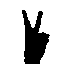

In [43]:
from tensorflow.keras.utils import load_img
img = load_img('Dataset/test/2/3.jpg',grayscale=True,target_size=(64,64))
img

In [45]:
from keras.preprocessing.image import img_to_array
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)
pred

NameError: name 'image' is not defined

In [ ]:
index = ['0','1','2','3','4','5']
res = str(index[pred[0]])
res